In [1]:
#Importing Library

In [2]:
import numpy as np
import pandas as pd
import os
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

In [3]:
#Loading Dataset

In [4]:
df_test = pd.read_csv('control_group.csv')
df_test.head()

,Campaign Name;Date;Spend [USD];# of Impressions;Reach;# of Website Clicks;# of Searches;# of View Content;# of Add to Cart;# of Purchase
0,Control Campaign;1.08.2019;2280;82702;56930;70...
1,Control Campaign;2.08.2019;1757;121040;102513;...
2,Control Campaign;3.08.2019;2343;131711;110862;...
3,Control Campaign;4.08.2019;1940;72878;61235;30...
4,Control Campaign;5.08.2019;1835;;;;;;;


In [5]:
#Data Cleaning

In [6]:
df_test[['Campaign Name','Date','Spend_USD','Number of Impressions','Reach','Number of Website Clicks',
        'Number of Searches','Number of View Content','Number of Add to Cart','Number of Purchase']]=df_test['Campaign Name;Date;Spend [USD];# of Impressions;Reach;# of Website Clicks;# of Searches;# of View Content;# of Add to Cart;# of Purchase'].str.split(';',expand=True)
df_test = df_test.drop(['Campaign Name;Date;Spend [USD];# of Impressions;Reach;# of Website Clicks;# of Searches;# of View Content;# of Add to Cart;# of Purchase'],axis=1)
df_test = df_test.reset_index(drop=True)
df_test.head()

,Campaign Name,Date,Spend_USD,Number of Impressions,Reach,Number of Website Clicks,Number of Searches,Number of View Content,Number of Add to Cart,Number of Purchase
0,Control Campaign,1.08.2019,2280,82702,56930,7016,2290,2159,1819,618
1,Control Campaign,2.08.2019,1757,121040,102513,8110,2033,1841,1219,511
2,Control Campaign,3.08.2019,2343,131711,110862,6508,1737,1549,1134,372
3,Control Campaign,4.08.2019,1940,72878,61235,3065,1042,982,1183,340
4,Control Campaign,5.08.2019,1835,,,,,,,


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Campaign Name             30 non-null     object
 1   Date                      30 non-null     object
 2   Spend_USD                 30 non-null     object
 3   Number of Impressions     30 non-null     object
 4   Reach                     30 non-null     object
 5   Number of Website Clicks  30 non-null     object
 6   Number of Searches        30 non-null     object
 7   Number of View Content    30 non-null     object
 8   Number of Add to Cart     30 non-null     object
 9   Number of Purchase        30 non-null     object
dtypes: object(10)
memory usage: 2.5+ KB


In [8]:
#change datatypes
df_test['Date'] = pd.to_datetime(df_test['Date'], format='%d.%m.%Y')
df_test.iloc[:,2:10] = df_test.iloc[:,2:10].apply(pd.to_numeric)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Campaign Name             30 non-null     object        
 1   Date                      30 non-null     datetime64[ns]
 2   Spend_USD                 30 non-null     object        
 3   Number of Impressions     29 non-null     object        
 4   Reach                     29 non-null     object        
 5   Number of Website Clicks  29 non-null     object        
 6   Number of Searches        29 non-null     object        
 7   Number of View Content    29 non-null     object        
 8   Number of Add to Cart     29 non-null     object        
 9   Number of Purchase        29 non-null     object        
dtypes: datetime64[ns](1), object(9)
memory usage: 2.5+ KB


In [9]:
df_test.describe()

,Date
count,30
mean,2019-08-15 12:00:00
min,2019-08-01 00:00:00
25%,2019-08-08 06:00:00
50%,2019-08-15 12:00:00
75%,2019-08-22 18:00:00
max,2019-08-30 00:00:00


In [11]:
df_control = pd.read_csv('control_group.csv')
df_control.head()

,Campaign Name;Date;Spend [USD];# of Impressions;Reach;# of Website Clicks;# of Searches;# of View Content;# of Add to Cart;# of Purchase
0,Control Campaign;1.08.2019;2280;82702;56930;70...
1,Control Campaign;2.08.2019;1757;121040;102513;...
2,Control Campaign;3.08.2019;2343;131711;110862;...
3,Control Campaign;4.08.2019;1940;72878;61235;30...
4,Control Campaign;5.08.2019;1835;;;;;;;


In [12]:
df_control[['Campaign Name','Date','Spend_USD','Number of Impressions','Reach','Number of Website Clicks',
        'Number of Searches','Number of View Content','Number of Add to Cart','Number of Purchase']]=df_control['Campaign Name;Date;Spend [USD];# of Impressions;Reach;# of Website Clicks;# of Searches;# of View Content;# of Add to Cart;# of Purchase'].str.split(';',expand=True)
df_control = df_control.drop(['Campaign Name;Date;Spend [USD];# of Impressions;Reach;# of Website Clicks;# of Searches;# of View Content;# of Add to Cart;# of Purchase'],axis=1)
df_control = df_control.reset_index(drop=True)
df_control.head()

,Campaign Name,Date,Spend_USD,Number of Impressions,Reach,Number of Website Clicks,Number of Searches,Number of View Content,Number of Add to Cart,Number of Purchase
0,Control Campaign,1.08.2019,2280,82702,56930,7016,2290,2159,1819,618
1,Control Campaign,2.08.2019,1757,121040,102513,8110,2033,1841,1219,511
2,Control Campaign,3.08.2019,2343,131711,110862,6508,1737,1549,1134,372
3,Control Campaign,4.08.2019,1940,72878,61235,3065,1042,982,1183,340
4,Control Campaign,5.08.2019,1835,,,,,,,


In [13]:
df_control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Campaign Name             30 non-null     object
 1   Date                      30 non-null     object
 2   Spend_USD                 30 non-null     object
 3   Number of Impressions     30 non-null     object
 4   Reach                     30 non-null     object
 5   Number of Website Clicks  30 non-null     object
 6   Number of Searches        30 non-null     object
 7   Number of View Content    30 non-null     object
 8   Number of Add to Cart     30 non-null     object
 9   Number of Purchase        30 non-null     object
dtypes: object(10)
memory usage: 2.5+ KB


In [14]:
#change datatypes
df_control['Date'] = pd.to_datetime(df_control['Date'], format='%d.%m.%Y')
df_control.iloc[:,2:10] = df_control.iloc[:,2:10].apply(pd.to_numeric)
df_control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Campaign Name             30 non-null     object        
 1   Date                      30 non-null     datetime64[ns]
 2   Spend_USD                 30 non-null     object        
 3   Number of Impressions     29 non-null     object        
 4   Reach                     29 non-null     object        
 5   Number of Website Clicks  29 non-null     object        
 6   Number of Searches        29 non-null     object        
 7   Number of View Content    29 non-null     object        
 8   Number of Add to Cart     29 non-null     object        
 9   Number of Purchase        29 non-null     object        
dtypes: datetime64[ns](1), object(9)
memory usage: 2.5+ KB


In [15]:
#There is a row with missing values. Let's fill the missing values with K-Nearest Neighbor.
imputer = KNNImputer(weights='distance')
df_control.iloc[:,2:10]=pd.DataFrame(imputer.fit_transform(df_control.iloc[:,2:10]))

In [16]:
df_control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Campaign Name             30 non-null     object        
 1   Date                      30 non-null     datetime64[ns]
 2   Spend_USD                 30 non-null     object        
 3   Number of Impressions     30 non-null     object        
 4   Reach                     30 non-null     object        
 5   Number of Website Clicks  30 non-null     object        
 6   Number of Searches        30 non-null     object        
 7   Number of View Content    30 non-null     object        
 8   Number of Add to Cart     30 non-null     object        
 9   Number of Purchase        30 non-null     object        
dtypes: datetime64[ns](1), object(9)
memory usage: 2.5+ KB


In [17]:
df_control.describe()

,Date
count,30
mean,2019-08-15 12:00:00
min,2019-08-01 00:00:00
25%,2019-08-08 06:00:00
50%,2019-08-15 12:00:00
75%,2019-08-22 18:00:00
max,2019-08-30 00:00:00


In [22]:
#Combine two datasets into one and add new features for metrics evaluation
df = pd.concat([df_test,df_control])
df = df.reset_index()
df['USD Spend per Purchase'] = round(df['Spend_USD']/df['Number of Purchase'],2)
df['CTR(%)'] = round(df['Number of Website Clicks']*100/df['Number of Impressions'],2)
df['Conversion Rate(%)'] = round(df['Number of Purchase']*100/df['Number of Website Clicks'],2)

TypeError: loop of ufunc does not support argument 0 of type float which has no callable rint method

In [20]:
df.head()

,index,Campaign Name,Date,Spend_USD,Number of Impressions,Reach,Number of Website Clicks,Number of Searches,Number of View Content,Number of Add to Cart,Number of Purchase
0,0,Control Campaign,2019-08-01,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,1,Control Campaign,2019-08-02,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,2,Control Campaign,2019-08-03,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,3,Control Campaign,2019-08-04,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,4,Control Campaign,2019-08-05,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df.tail()

,index,Campaign Name,Date,Spend_USD,Number of Impressions,Reach,Number of Website Clicks,Number of Searches,Number of View Content,Number of Add to Cart,Number of Purchase
55,25,Control Campaign,2019-08-26,2233.0,124897.0,98432.0,5435.0,2847.0,2421.0,1448.0,251.0
56,26,Control Campaign,2019-08-27,2061.0,104678.0,91579.0,4941.0,3549.0,3249.0,980.0,605.0
57,27,Control Campaign,2019-08-28,2421.0,141654.0,125874.0,6287.0,1672.0,1589.0,1711.0,643.0
58,28,Control Campaign,2019-08-29,2375.0,92029.0,74192.0,8127.0,4891.0,4219.0,1486.0,334.0
59,29,Control Campaign,2019-08-30,2324.0,111306.0,88632.0,4658.0,1615.0,1249.0,442.0,670.0


In [24]:
df.describe()

,index,Date
count,60.000000,60
mean,14.500000,2019-08-15 12:00:00
min,0.000000,2019-08-01 00:00:00
25%,7.000000,2019-08-08 00:00:00
50%,14.500000,2019-08-15 12:00:00
75%,22.000000,2019-08-23 00:00:00
max,29.000000,2019-08-30 00:00:00
std,8.728484,NaN


In [25]:
#Data Visualization

ValueError: Could not interpret value `CTR(%)` for parameter `x`

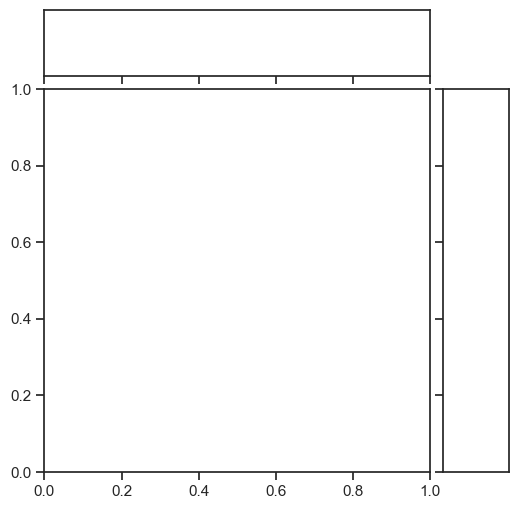

In [26]:
sns.set_theme(style="ticks")
g = sns.jointplot(
    data=df,
    x="CTR(%)", y="Conversion Rate(%)", hue="Campaign Name",
    kind="kde",
)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

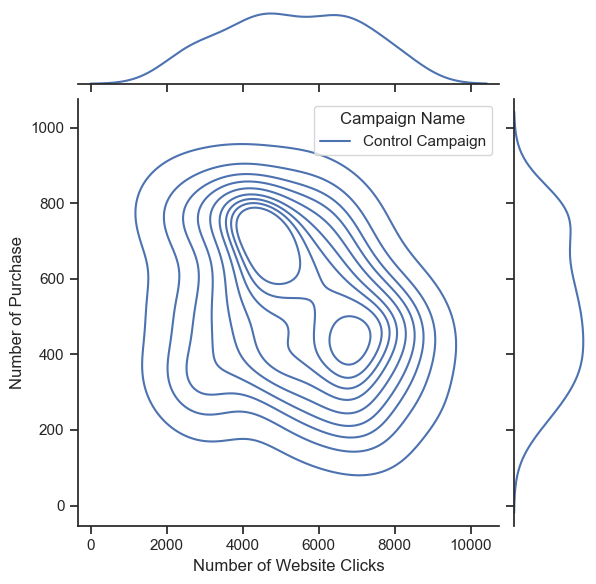

In [27]:
sns.set_theme(style="ticks")
g = sns.jointplot(
    data=df,
    x="Number of Website Clicks", y="Number of Purchase", hue="Campaign Name",
    kind="kde",
)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

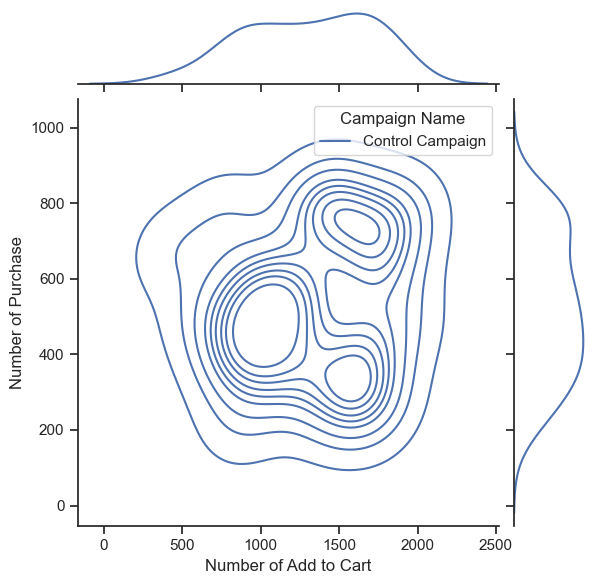

In [28]:
sns.set_theme(style="ticks")
g = sns.jointplot(
    data=df,
    x="Number of Add to Cart", y="Number of Purchase", hue="Campaign Name",
    kind="kde",
)
plt.show()

ValueError: Could not interpret value `USD Spend per Purchase` for parameter `y`

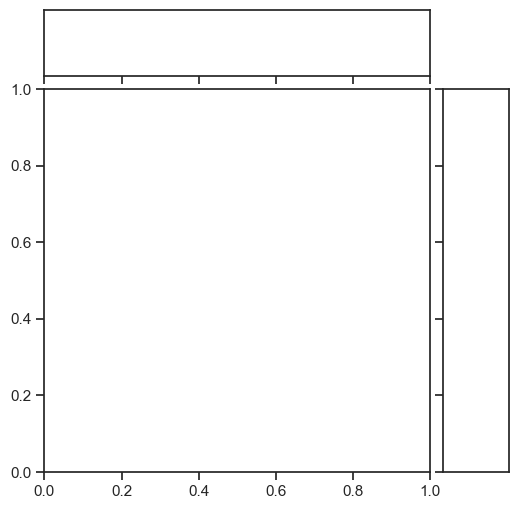

In [29]:
sns.set_theme(style="ticks")
g = sns.jointplot(
    data=df,
    x="Spend_USD", y="USD Spend per Purchase", hue="Campaign Name",
    kind="kde",
)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

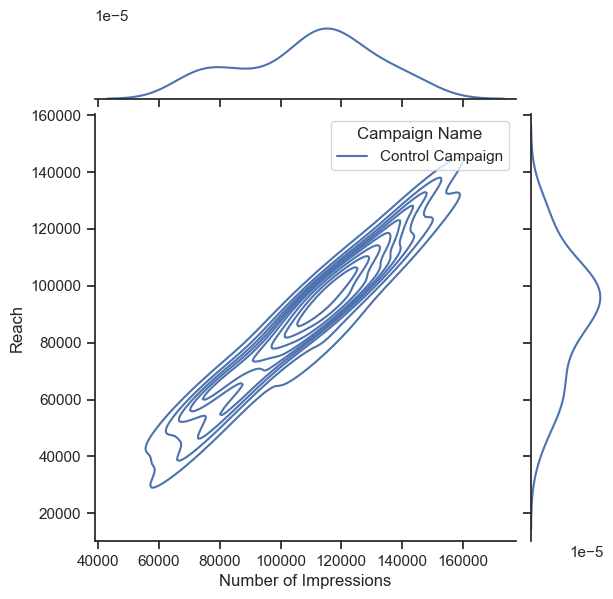

In [30]:
sns.set_theme(style="ticks")
g = sns.jointplot(
    data=df,
    x="Number of Impressions", y="Reach", hue="Campaign Name",
    kind="kde",
)
plt.show()

In [31]:
total_spend = df.groupby(['Campaign Name'])['Spend_USD'].sum().reset_index()
total_spend

,Campaign Name,Spend_USD
0,Control Campaign,137306.0


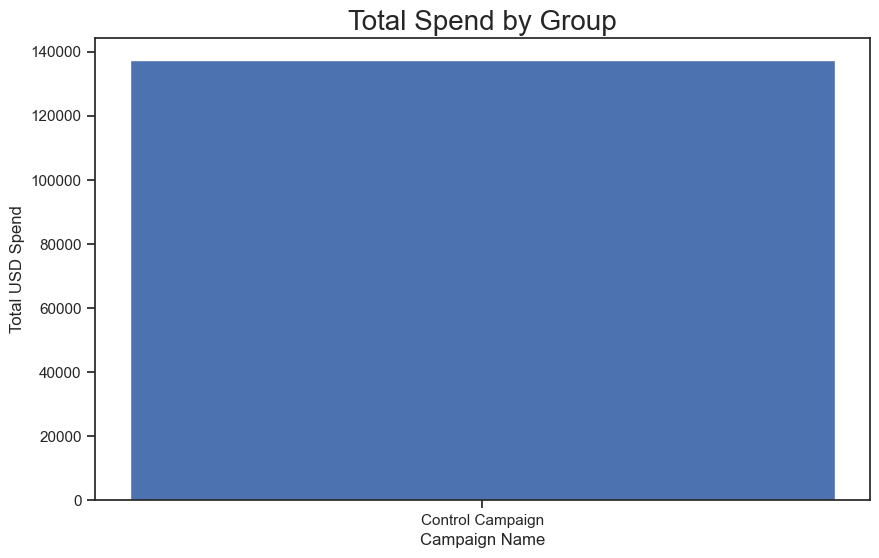

In [32]:
fig = plt.figure(figsize = (10, 6))
plt.bar(total_spend['Campaign Name'], total_spend['Spend_USD'], width = 0.3)
plt.xlabel("Campaign Name")
plt.ylabel("Total USD Spend")
plt.title("Total Spend by Group", fontdict = {'fontsize' : 20})
plt.show()

In [33]:
spend_per_purchase = df.groupby(['Campaign Name'])['USD Spend per Purchase'].mean().reset_index()
spend_per_purchase

KeyError: 'Column not found: USD Spend per Purchase'

In [34]:
spend_per_purchase_uplift = (5.900000-4.986333)/4.986333
spend_per_purchase_uplift

0.1832342525057994

In [35]:
fig = plt.figure(figsize = (10,6))
plt.bar(spend_per_purchase['Campaign Name'], spend_per_purchase['USD Spend per Purchase'], width = 0.4)
plt.xlabel("Campaign Name")
plt.ylabel("Average USD Spend per Purchase")
plt.title("Average USD Spend per Purchase by Group", fontdict = {'fontsize' : 20})
plt.show()

NameError: name 'spend_per_purchase' is not defined

<Figure size 1000x600 with 0 Axes>

In [36]:
num_of_purchase = df.groupby(['Campaign Name'])['Number of Purchase'].sum().reset_index()
num_of_purchase

,Campaign Name,Number of Purchase
0,Control Campaign,30920.735991


In [37]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=df, kind="bar",x="Campaign Name",
    y="Conversion Rate(%)",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Conversion Rate(%)")
plt.title('Conversion Rate by Group', fontdict = {'fontsize' : 20})
plt.show()

ValueError: Could not interpret input 'Conversion Rate(%)'

In [38]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=df, kind="bar",x="Campaign Name",
    y="CTR(%)",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "CTR(%)")
plt.title('CTR by Group', fontdict = {'fontsize' : 20})
plt.show()

ValueError: Could not interpret input 'CTR(%)'

/var/folders/s2/95z7p_8d3s94t_ftw23kxv7h0000gn/T/ipykernel_3251/3127696079.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  g = sns.catplot(


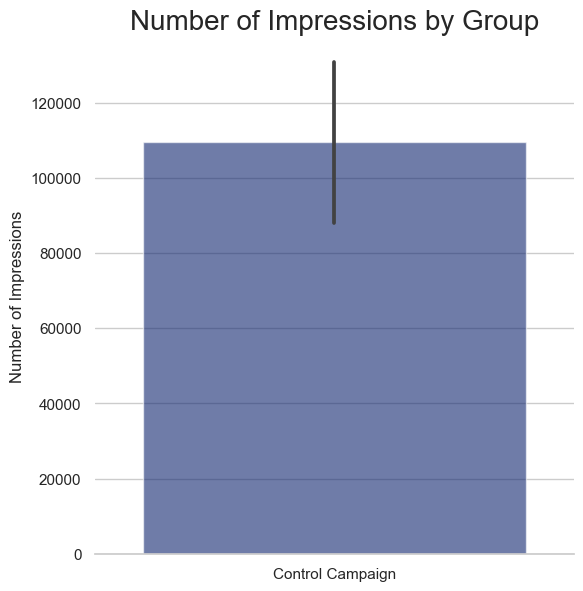

In [39]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=df, kind="bar",x="Campaign Name",
    y="Number of Impressions",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Number of Impressions")
plt.title('Number of Impressions by Group', fontdict = {'fontsize' : 20})
plt.show()

/var/folders/s2/95z7p_8d3s94t_ftw23kxv7h0000gn/T/ipykernel_3251/3794109979.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  g = sns.catplot(


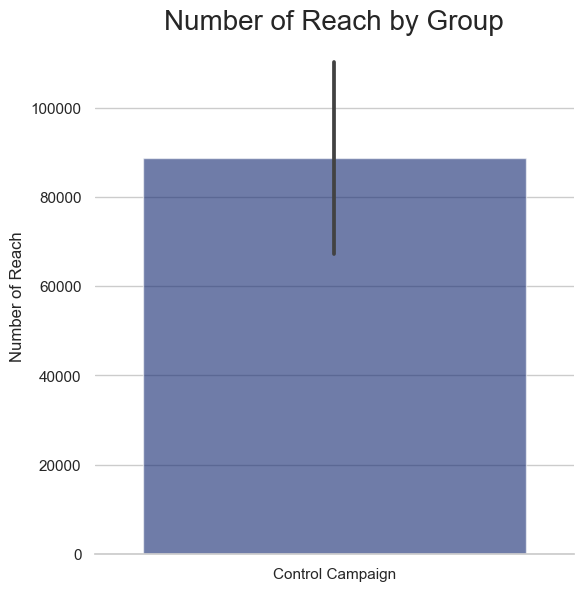

In [40]:
sns.set_theme(style="whitegrid")
g = sns.catplot(
    data=df, kind="bar",x="Campaign Name",
    y="Reach",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Number of Reach")
plt.title('Number of Reach by Group', fontdict = {'fontsize' : 20})
plt.show()

In [42]:
#Running T test
#As the goal of this A/B test is to figure out whether the new bidding type is bringing more conversions. Let's focus on the conversion rate.
#Plot the Data Distribution

In [43]:
df_2 = df.copy()
df_2 = df_2.drop(['index','Date'], axis=1)
df_2['Campaign Name'] = pd.get_dummies(df_2['Campaign Name'], drop_first=True)
df_2 = df_2.reset_index(drop=True)
test_g = df_2[df_2['Campaign Name']==1]
control_g = df_2[df_2['Campaign Name']==0]

ValueError: Columns must be same length as key

In [44]:
test_group = test_g['Conversion Rate(%)']
control_group = control_g['Conversion Rate(%)']
test_group.describe()

NameError: name 'test_g' is not defined

In [45]:
control_group.describe()

NameError: name 'control_group' is not defined

In [46]:
plt.figure(figsize=(20, 10))
sns.kdeplot(control_group, label="Control", shade = True, color = '#000000')
sns.kdeplot(test_group, label="Test", shade = True, color = '#B22222')
plt.legend()

NameError: name 'control_group' is not defined

<Figure size 2000x1000 with 0 Axes>

In [47]:
sns.boxplot(df['Conversion Rate(%)'])

KeyError: 'Conversion Rate(%)'

In [48]:
print(np.where(df['Conversion Rate(%)']>25))

KeyError: 'Conversion Rate(%)'

In [49]:
#remove the outliers
df_2 = df_2[df_2['Conversion Rate(%)']<25]
test_g = df_2[df_2['Campaign Name']==1]
control_g = df_2[df_2['Campaign Name']==0]
test_group = test_g['Conversion Rate(%)']
control_group = control_g['Conversion Rate(%)']

KeyError: 'Conversion Rate(%)'

In [50]:
#now plot the data distribution again
plt.figure(figsize=(20, 10))
sns.kdeplot(control_group, label="Control", shade = True, color = '#000000')
sns.kdeplot(test_group, label="Test", shade = True, color = '#B22222')
plt.legend()

NameError: name 'control_group' is not defined

<Figure size 2000x1000 with 0 Axes>

In [52]:
Now the data distribution is close to normal, let's run the t test.

SyntaxError: unterminated string literal (detected at line 1) (3009430247.py, line 1)

In [53]:
## H0: A = B  - Null Hypothesis
## H1: A != B  - Alternative Hypothesis
# set ⍺ = 0.05
test = stats.ttest_ind(test_group,control_group, equal_var = True)

print(test)

NameError: name 'test_group' is not defined